# Pupil Variability (Figure1)

Text(0.05, 0.95, 'n = 7')

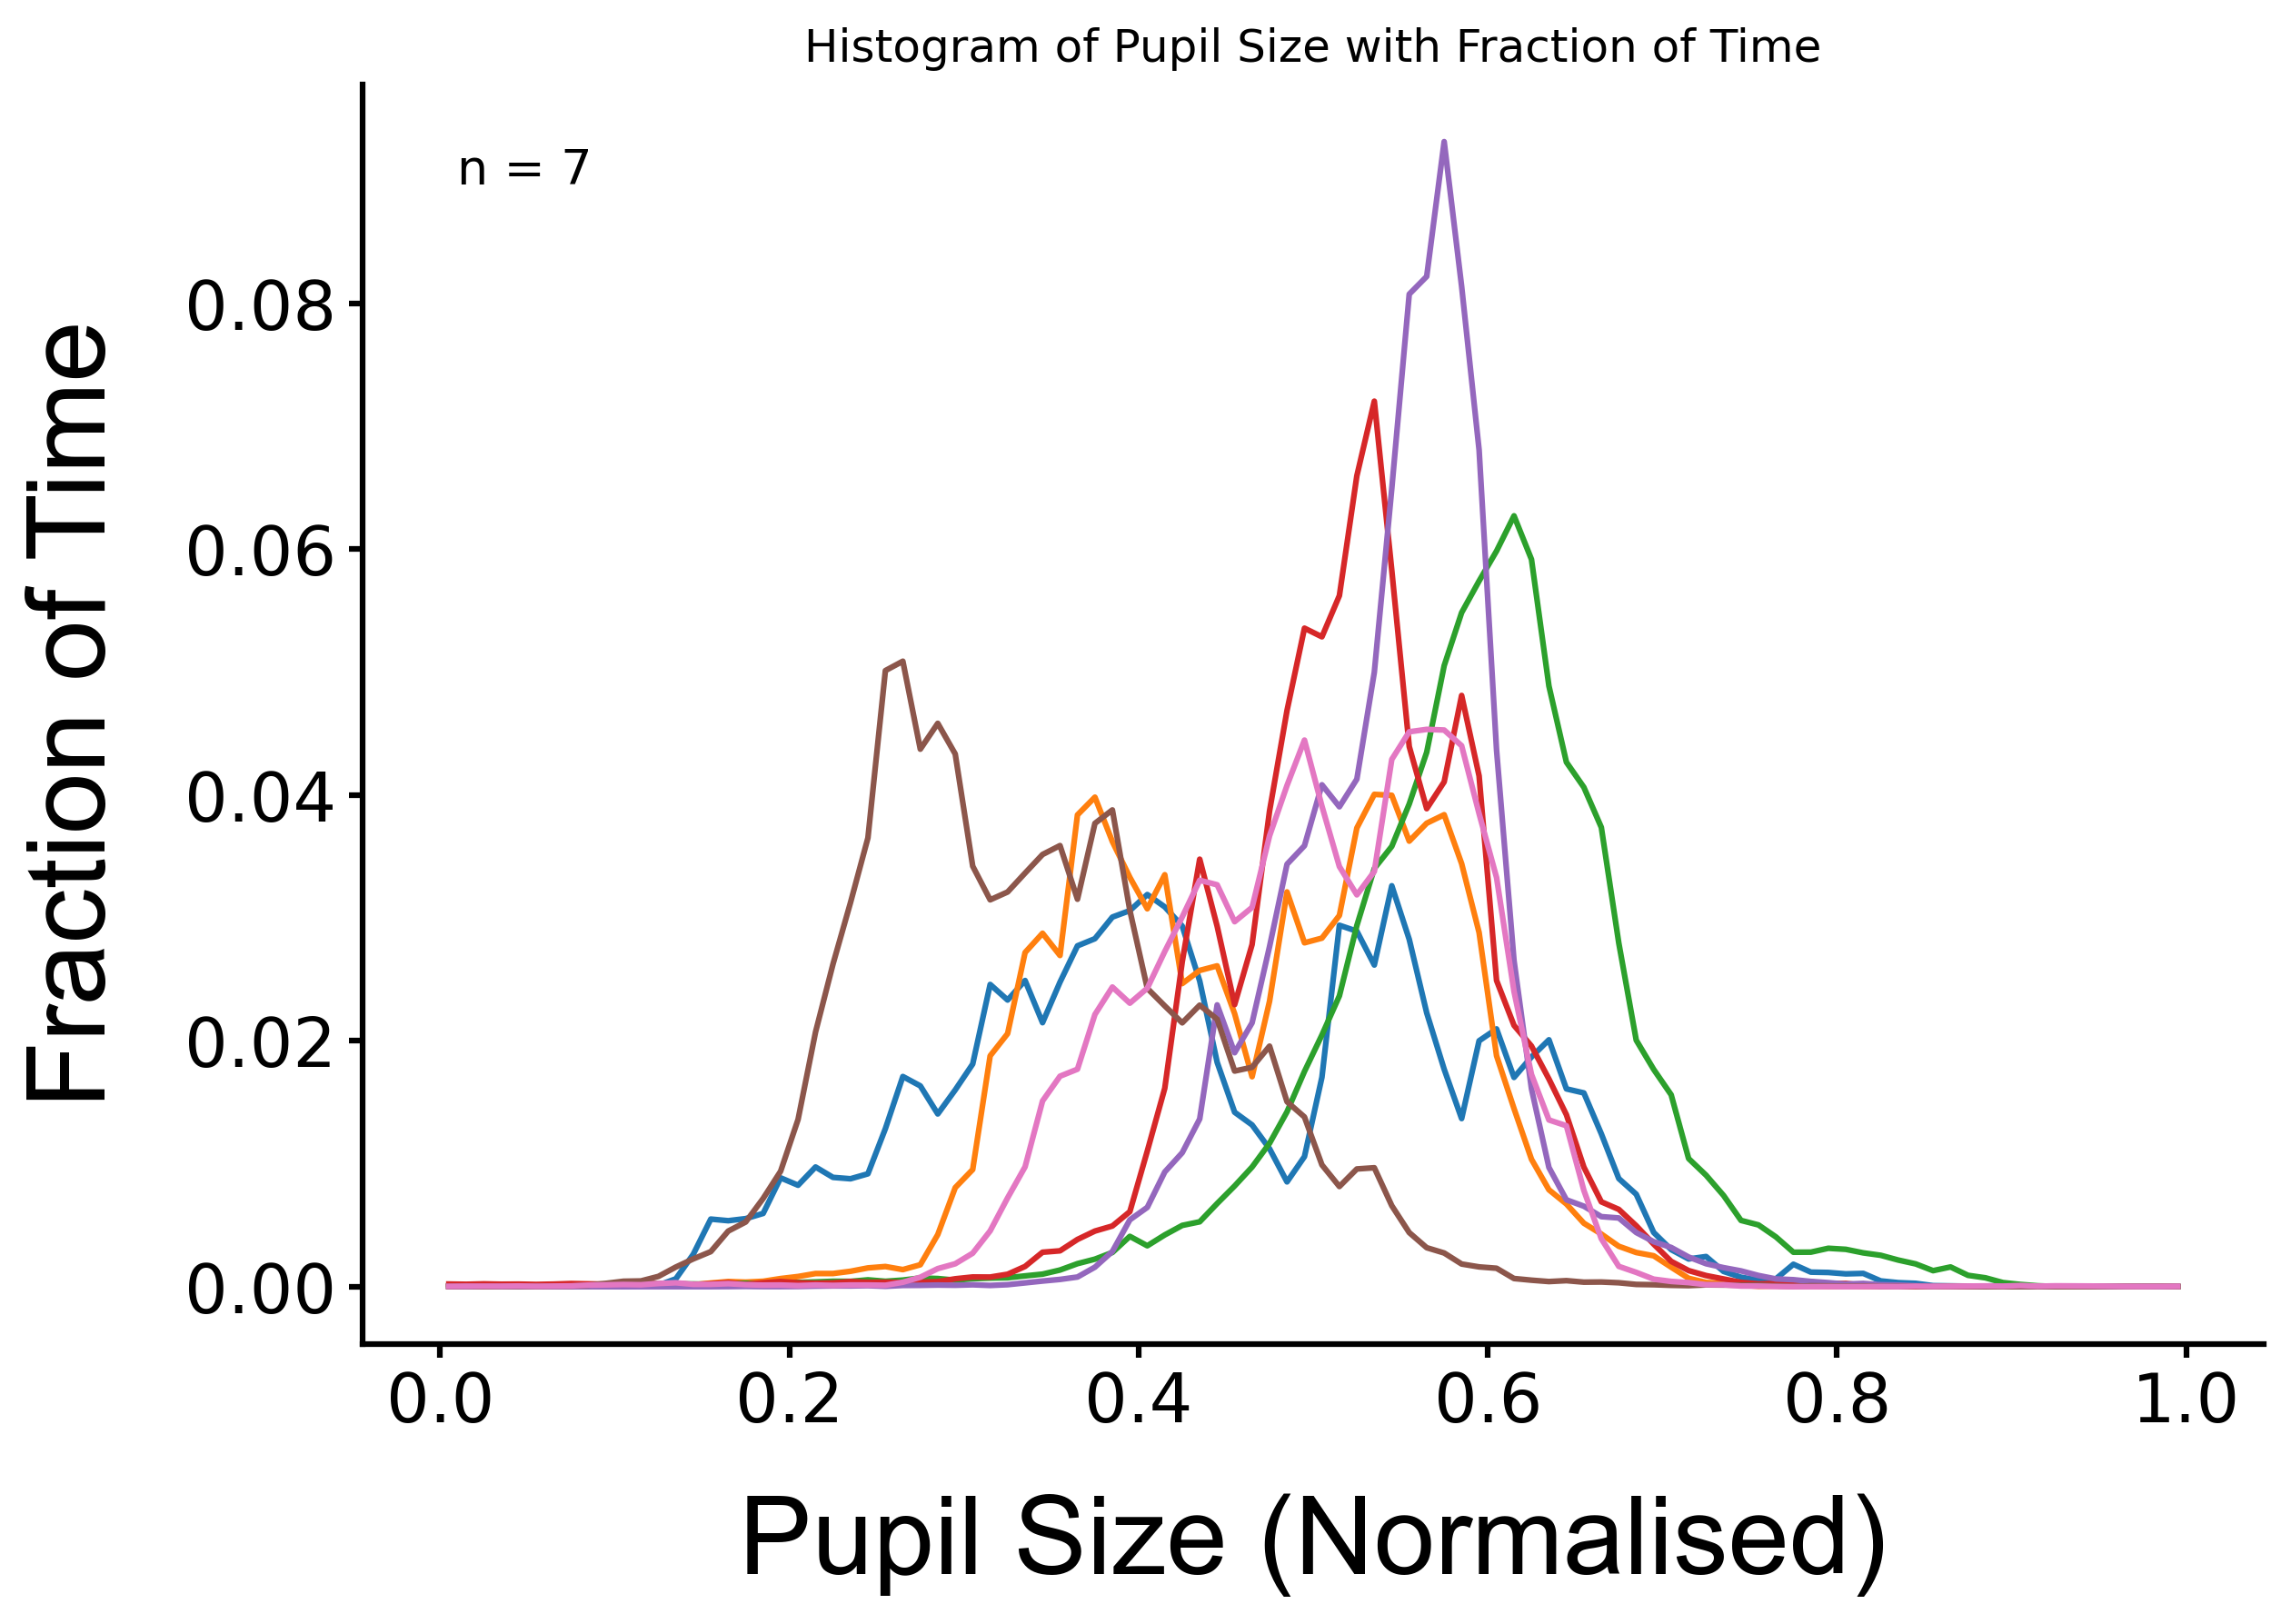

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


names = ['Cole', 'Calvin', 'Charlie', 'Chase', 'Conner', 'Clive', 'Cooper']

# Plot the histogram
fig, ax = plt.subplots(dpi=300)
fig.set_size_inches(9, 6)

for name in names:
    file_path = f'/Users/zhangpan/MasterProject/pupil_variability/{name}.csv'

    df_pupil = pd.read_csv(file_path)
            
    # Drop NaN values from pupil size column (assuming column name is 'x')
    df_pupil.dropna(subset=['x'], inplace=True)

    # Normalize pupil size values to range [0, 1]
    scaler = MinMaxScaler(feature_range=(0, 1))

    if name == 'Cole':
        normalized_sizes = scaler.fit_transform(df_pupil[['x']]).flatten()
    else:
        normalized_sizes = scaler.fit_transform(df_pupil[['y']]).flatten()

    # Calculate the histogram frequency array with bin size 0.05
    bin_size = 0.01
    bins = np.arange(0, 1 + bin_size, bin_size)  # Creating bin edges from 0 to 1 with a step of 0.01
    hist, bin_edges = np.histogram(normalized_sizes, bins=bins)


    # Calculate duration from the timestamp column (assuming it's in seconds and the last timestamp gives the total duration)
    duration = df_pupil['timestamp'].iloc[-1]

    # Convert histogram frequencies to fraction of time (assuming 60fps recording)
    total_length = len(df_pupil)
    fraction_of_time = hist / total_length

    # Plot histogram
    # ax.bar(bin_edges[:-1], fraction_of_time, width=bin_size, edgecolor='black', align='edge')

    # Adjust bins to match the length of fraction_of_time
    bin_centers = bin_edges[:-1] + bin_size / 2

    # Plotting the line
    ax.plot(bin_centers, fraction_of_time, '-')


ax.set_xlabel('Pupil Size (Normalised)', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_ylabel('Fraction of Time', labelpad=15, size=29, fontweight=1.5, family='Arial')
ax.set_title('Histogram of Pupil Size with Fraction of Time')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)  # Adjust the width as needed
ax.spines['left'].set_linewidth(1.5)


ax.tick_params(axis='x', labelsize=18, width=1.5)
ax.tick_params(axis='y', labelsize=18, width=1.5)

ax.text(0.05, 0.95, f'n = 7', fontsize=13, ha='left', va='top', transform=ax.transAxes)